In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

#For displaying all the columns in the data set in the results:
pd.set_option('display.max_columns', None)

## 1. DATA READING AND UNDERSTANDING

In [2]:
#Reading the file
lead =pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Description 
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
#Shape
lead.shape

(9240, 37)

In [5]:
#information about the column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# 2. DATA CLEANING

Checking for null values

In [6]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are a total 17 columns with null value and for sum columns null valued are greater than 1000, so we have to check the percentage of its and then filter the null value with 50%

In [7]:
#Converting into percentage
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#Dropping the columns with more than 50% NA values.
lead = lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>50)].columns, 1)
lead.shape

(9240, 36)

Removing the rows with the null value will affect a lot of data and they are important columns. Hence we are going to replace the null values with 'not provided'

In [9]:
#Converting the null value with "not provided"
lead['Specialization'] = lead['Specialization'].fillna('not provided') 
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna('not provided')
lead['Country'] = lead['Country'].fillna('not provided')
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('not provided')
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

We remove the null values that are more than 35% and also the respective columns that are not very useful 

In [11]:
#Dropping the columns with the highest number of null values
lead = lead.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','How did you hear about X Education','City'],axis=1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [12]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [13]:
#Eliminating the null values
lead['TotalVisits']=lead['TotalVisits'].fillna(lead['TotalVisits'].median())
lead['Page Views Per Visit']=lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median())
lead['Lead Source']=lead['Lead Source'].fillna('Google')
lead['Last Activity']=lead['Last Activity'].fillna('Email Opened')

In [14]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

The Null values are now 0. 

### 3. EDA

Looking at the numerical and categorical variables

In [15]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

 Checking the convertion rate

In [16]:
#percentage of converted
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

38.53896103896104

The rate of conversion of leads is 39%

Text(0.5, 1.0, 'lead')

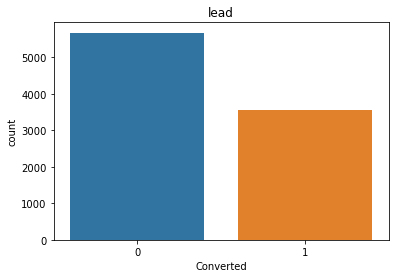

In [17]:
#Plot of the converted leads
sns.countplot(lead['Converted'])
plt.title('lead')

From the above plot, it is observed that a higher number of leads are not convereted. 

Plotting all the categorical variables

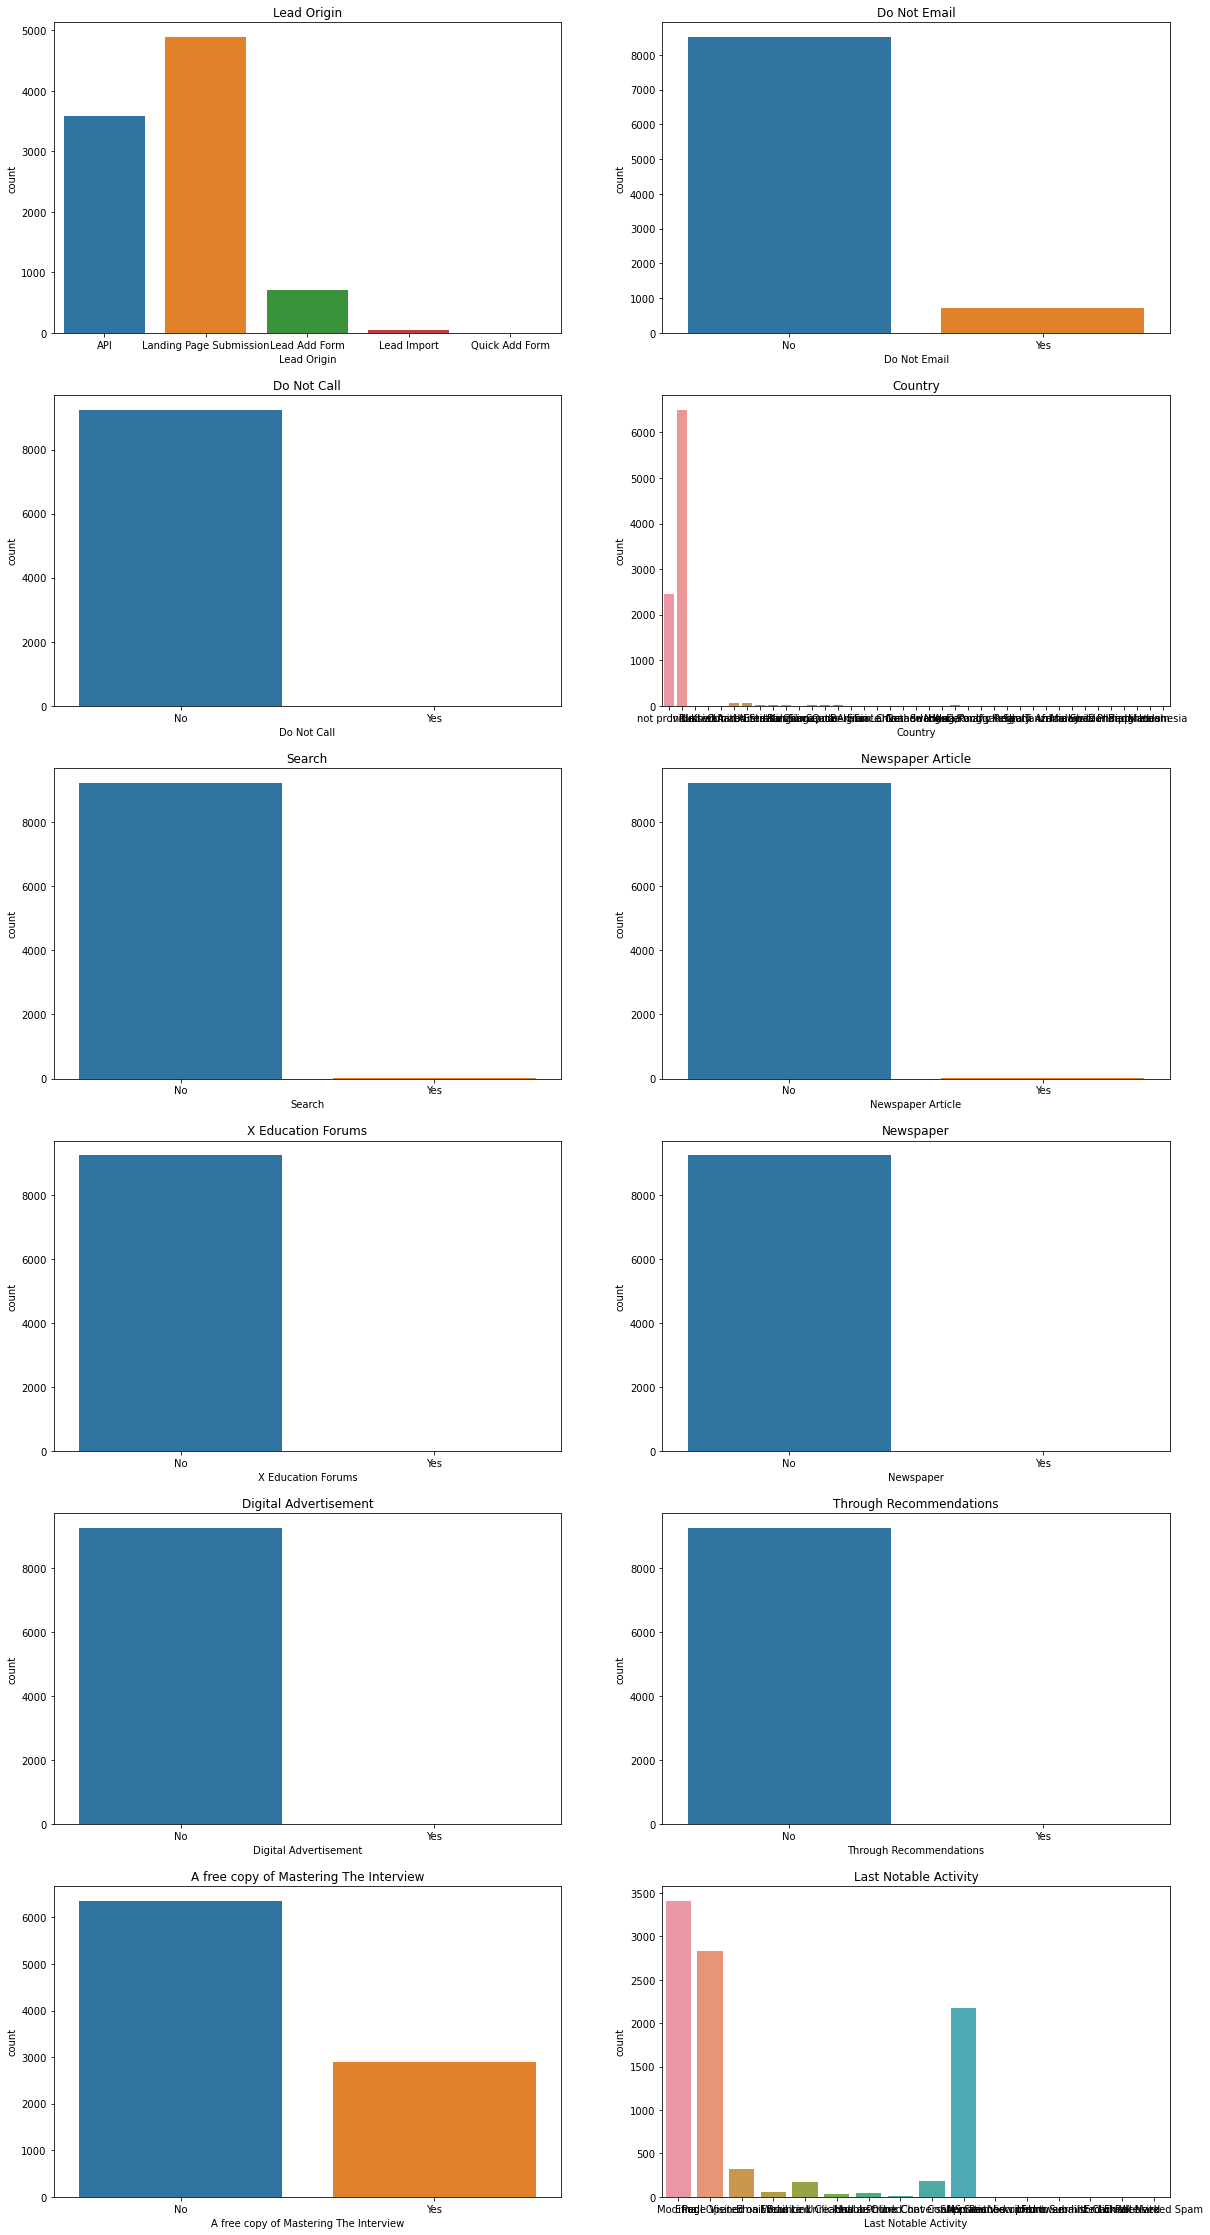

In [18]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(lead['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(lead['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(lead['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(lead['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(lead['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(lead['Last Notable Activity'])
plt.title('Last Notable Activity')

plt.show()

• Leads are originated mainly from the landing page and are from India. 

• A majority of the leads have selected the option ‘don not sent mail’ and ‘don’t call’ which has a countereffect on the leads generation.

• There are many columns which are highly skewed such as ‘newspaper article’, ‘X education forms’ etc. 

• Modified are observing most in the last notable activity

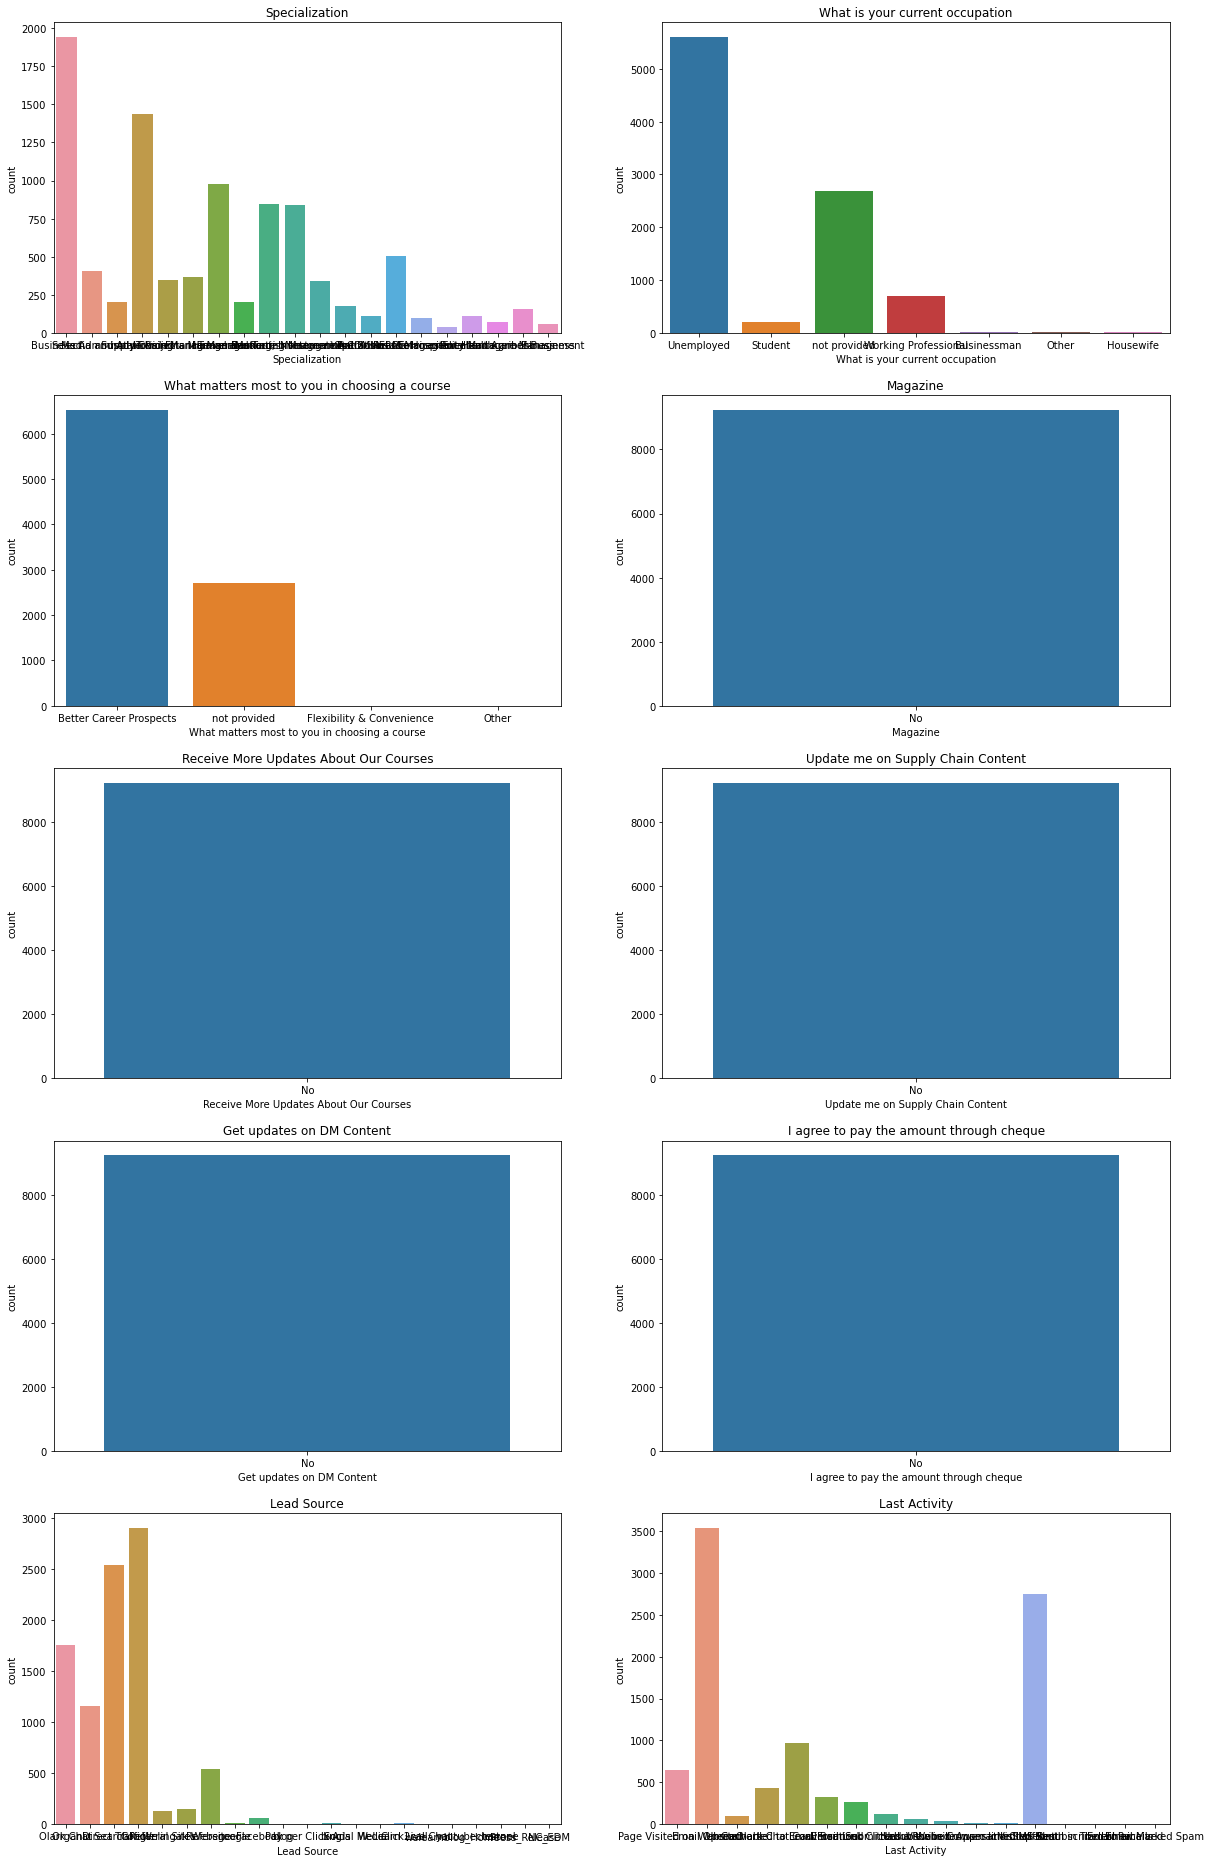

In [19]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead['Specialization'])
plt.title('Specialization')

plt.subplot(6,2,2)
sns.countplot(lead['What is your current occupation'])
plt.title('What is your current occupation')

plt.subplot(6,2,3)
sns.countplot(lead['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course')

plt.subplot(6,2,4)
sns.countplot(lead['Magazine'])
plt.title('Magazine')

plt.subplot(6,2,5)
sns.countplot(lead['Receive More Updates About Our Courses'])
plt.title('Receive More Updates About Our Courses')

plt.subplot(6,2,6)
sns.countplot(lead['Update me on Supply Chain Content'])
plt.title('Update me on Supply Chain Content')

plt.subplot(6,2,7)
sns.countplot(lead['Get updates on DM Content'])
plt.title('Get updates on DM Content')

plt.subplot(6,2,8)
sns.countplot(lead['I agree to pay the amount through cheque'])
plt.title('I agree to pay the amount through cheque')

plt.subplot(6,2,9)
sns.countplot(lead['Lead Source'])
plt.title('Lead Source')

plt.subplot(6,2,10)
sns.countplot(lead['Last Activity'])
plt.title('Last Activity')


plt.show()

• Most people are unemployed and looked into the course for better career prospects and searched on google, direct traffic and selected the specialization with ‘select’ and not provided. 

• Some of the columns have only one sided date such as ‘magazine’, ‘Receive More Updates About Our Courses’ etc. 

Checking all the categorical variable against the target variable

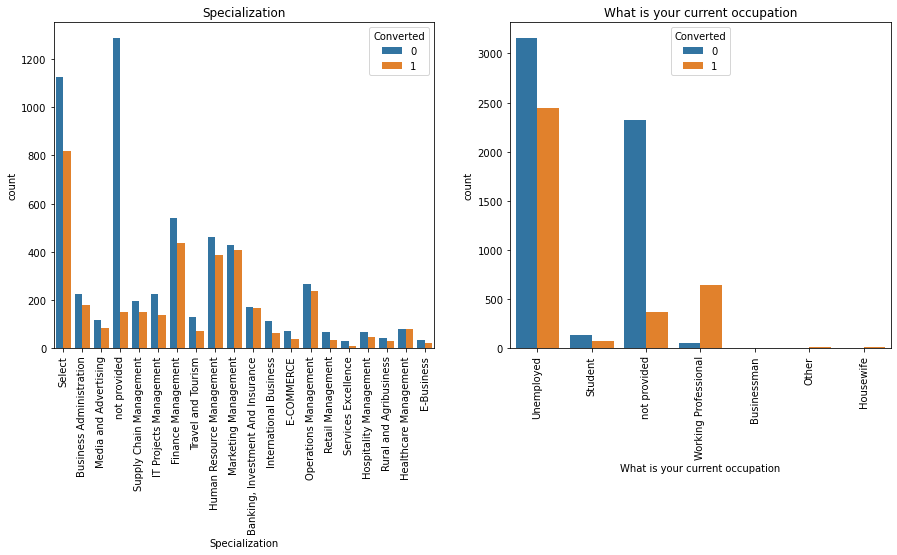

In [20]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Specialization", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x = "What is your current occupation",hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

• The leads are higher in specialization of marketing, finance, operations, business administration. 

• The working professionals and unemployed leads are interested in the courses. 

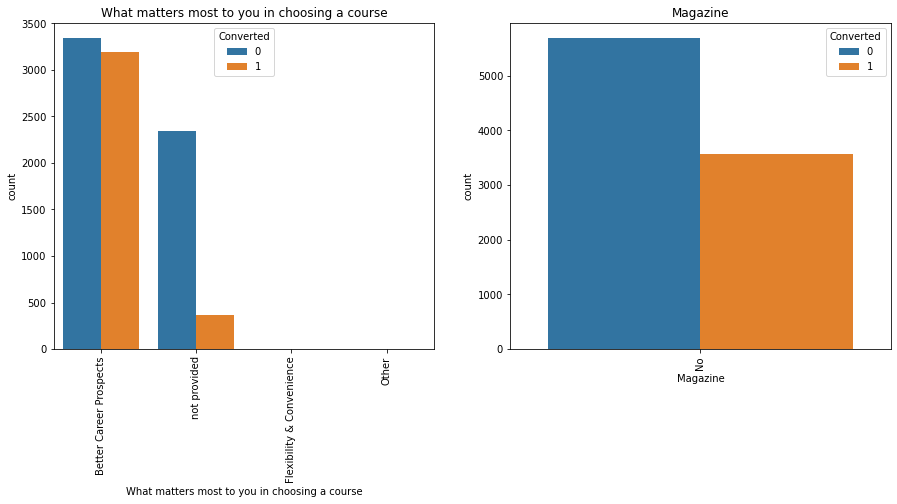

In [21]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x = "Magazine", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Magazine')

plt.show()


Most people are interested in the courses for better career prospects.

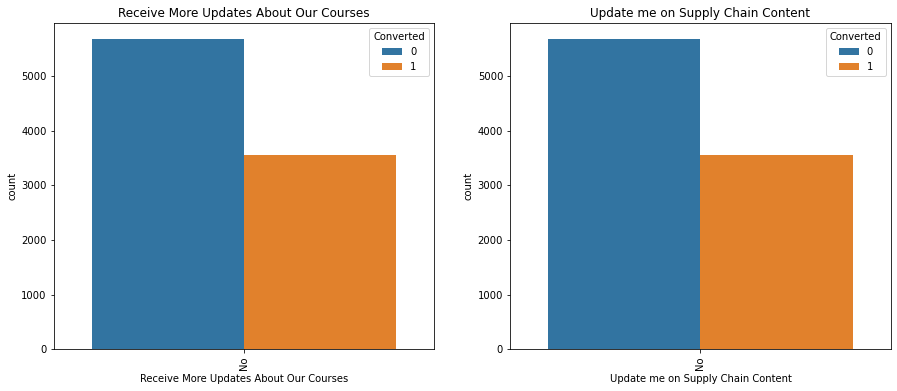

In [22]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Receive More Updates About Our Courses')

plt.subplot(1,2,2)
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Update me on Supply Chain Content')

plt.show()


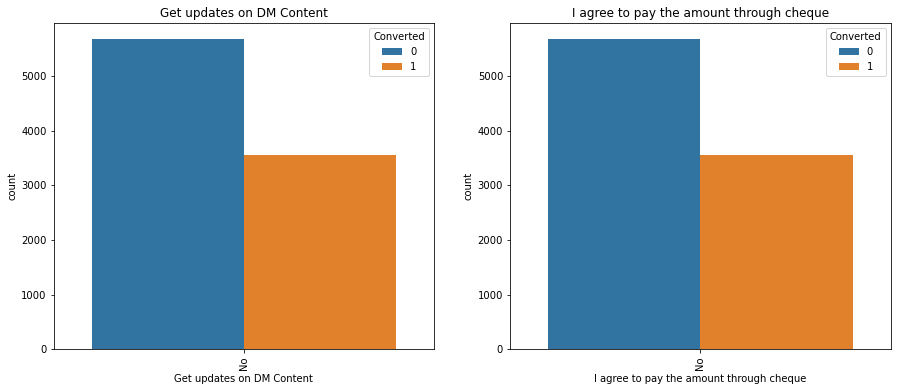

In [23]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Get updates on DM Content')

plt.subplot(1,2,2)
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('I agree to pay the amount through cheque')

plt.show()

Varaibles Magazine, receive more updates about courses, update on supply chain content, get updates on DM content and agree to pay amount through cheque have only one category "No"

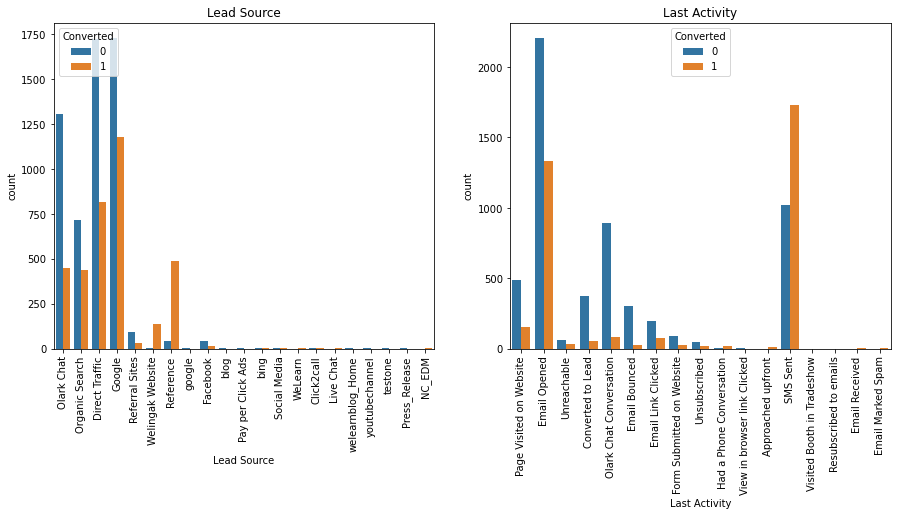

In [24]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Lead Source", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(1,2,2)
sns.countplot(x = "Last Activity", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

In Lead Source: the number of Hot leads is higher in Direct Traffic and Google and less in Other Categories

In Last Activity the number of Hot leads is higher in SMS and in EMAIL opened.

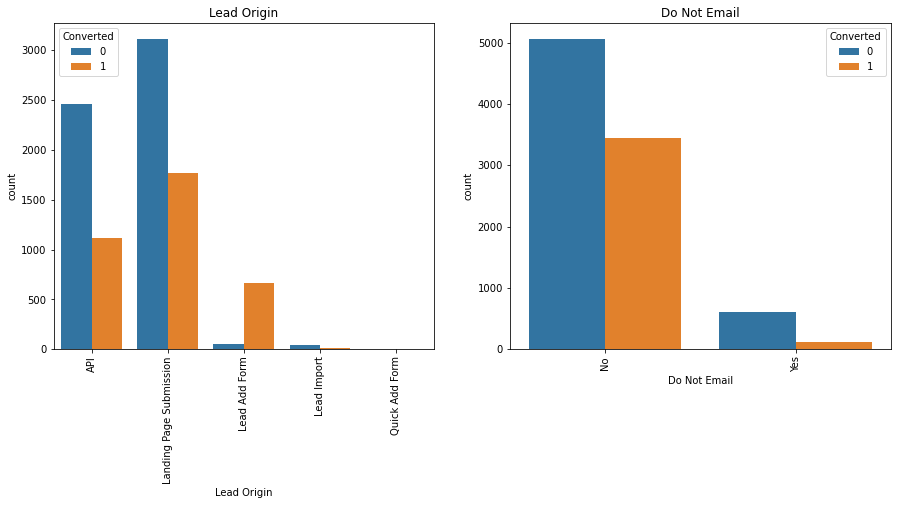

In [25]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.show()

Most of the leads are coming via the landing page submission, API and lead add form. 

Leads asking  to be sent emails are less.

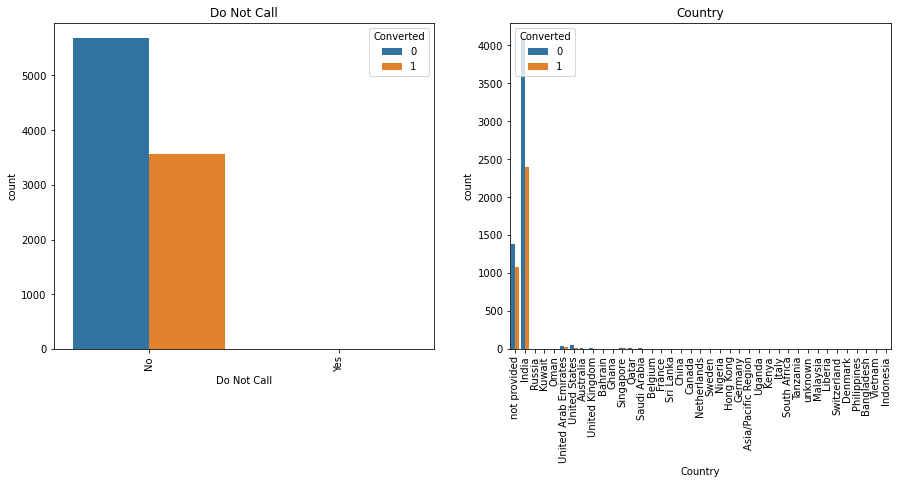

In [26]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(1,2,2)
sns.countplot(x = "Country", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.show()

Variable do not call has only 1 category which is No and most of the leads are from India

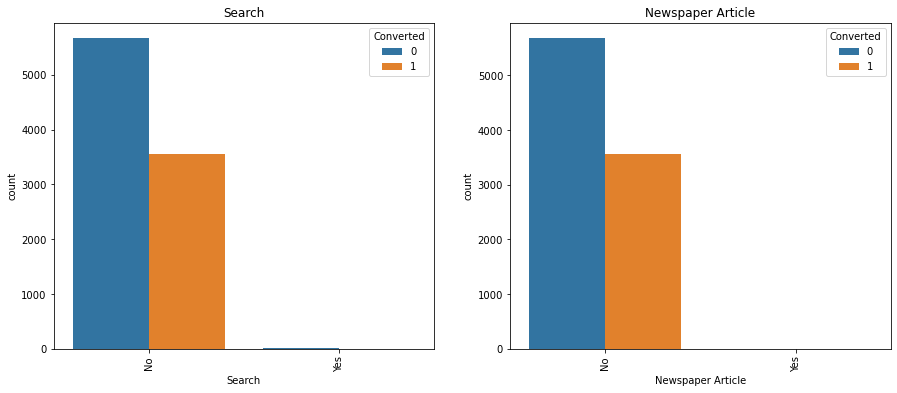

In [27]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Search", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(1,2,2)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.show()

There are no leads coming from search and newspaper article

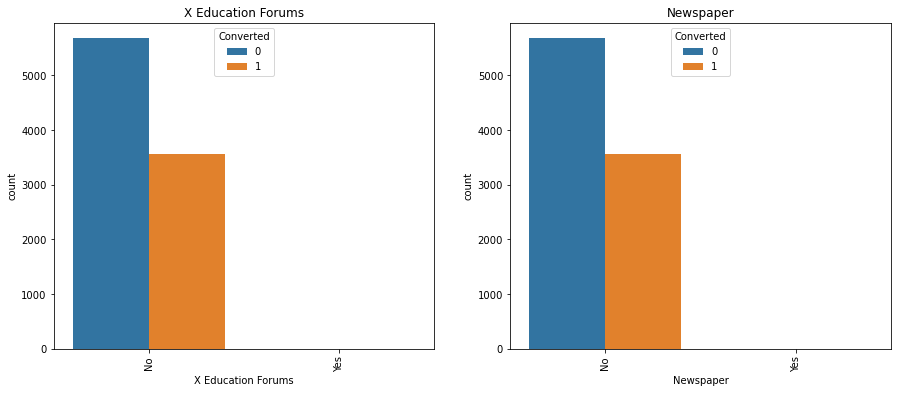

In [28]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(1,2,2)
sns.countplot(x = "Newspaper", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.show()

There are no leads coming from X Education Forums and newspaper

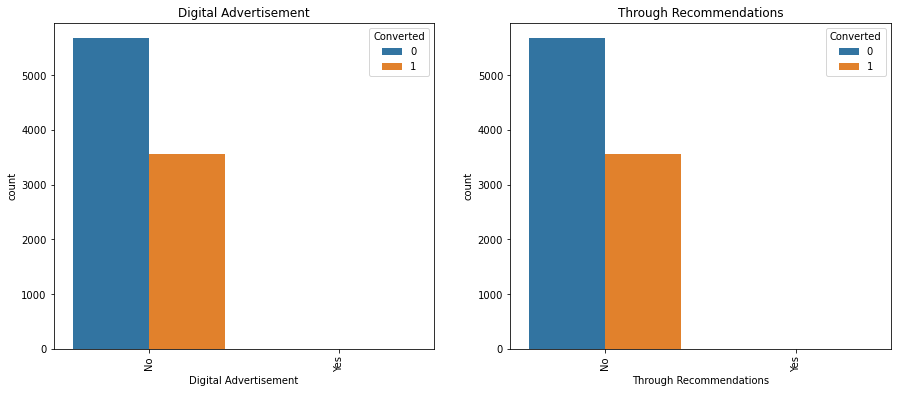

In [29]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(1,2,2)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.show()


There are no leads coming from Through Recommendations and Digital Advertisement

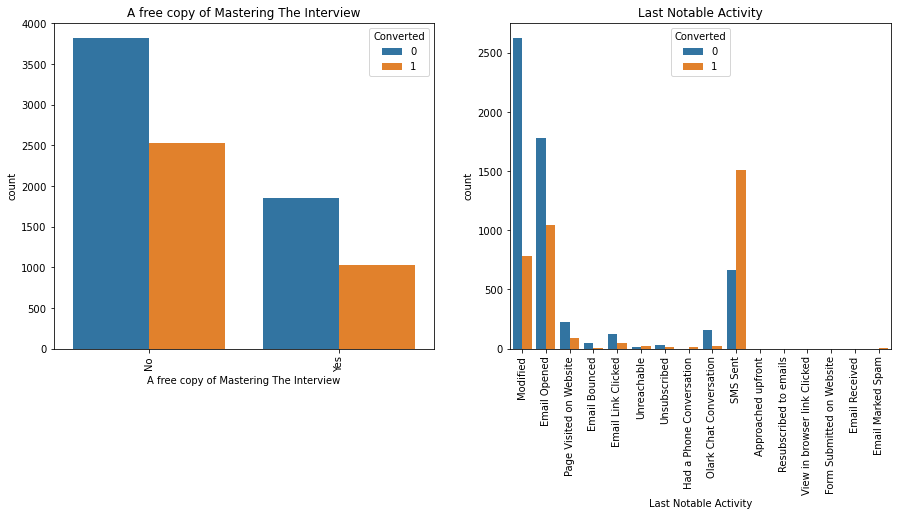

In [30]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(1,2,2)
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In Last notable activity the number of leads is higher in SMS and in EMAIL.

Checking all the Numerical Variables


-- Lead Number
-- TotalVisits
-- Total Time Spent on Website
-- Page Views Per Visit

# Outlier analysis. 

Text(0.5, 1.0, 'Total Visits')

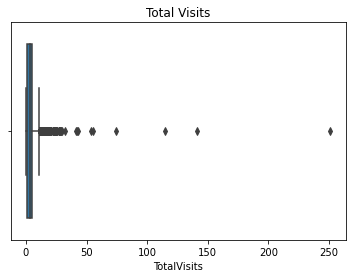

In [31]:
sns.boxplot(lead['TotalVisits'])
plt.title('Total Visits')

There are outliers present

Text(0.5, 1.0, 'Page Views Per Visit')

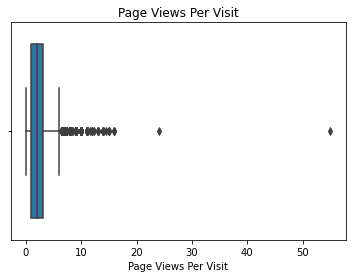

In [32]:
sns.boxplot(lead['Page Views Per Visit'])
plt.title('Page Views Per Visit')

There are outliers present

Text(0.5, 1.0, 'Lead Number')

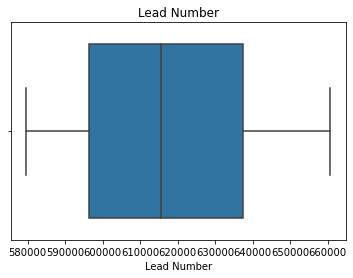

In [33]:
sns.boxplot(lead['Lead Number'])
plt.title('Lead Number')

There are no outliers present

Text(0.5, 1.0, 'Total Time Spent on Website')

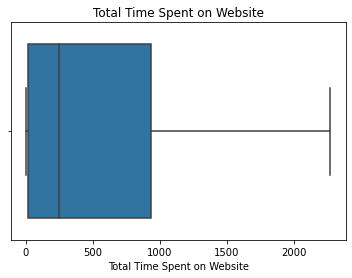

In [34]:
sns.boxplot(lead['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

There are no outliers and the values are spread above median

All continuous variables against lead

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

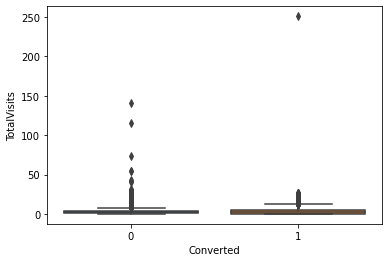

In [35]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

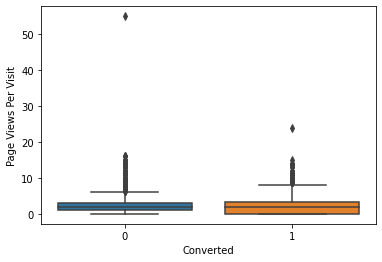

In [36]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

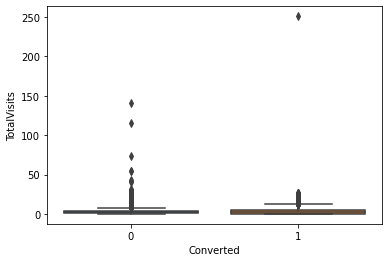

In [37]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)

The analysis is the same for above univariative analysis

LOOKING AT THE CORRELATION BETWEEN ALL THE CONTINUOUS NUMERIC VARIABLES

In [38]:
#Looking at the correlation between the continuous numeric variables in the data
correlation_continuous_numerical = lead[['Lead Number','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr()
correlation_continuous_numerical

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.021366,0.020329,0.057042
Converted,0.025157,1.000000,0.029119,0.362483,-0.005068
TotalVisits,0.021366,0.029119,1.000000,0.217341,0.512214
Total Time Spent on Website,0.020329,0.362483,0.217341,1.000000,0.314266
Page Views Per Visit,0.057042,-0.005068,0.512214,0.314266,1.000000


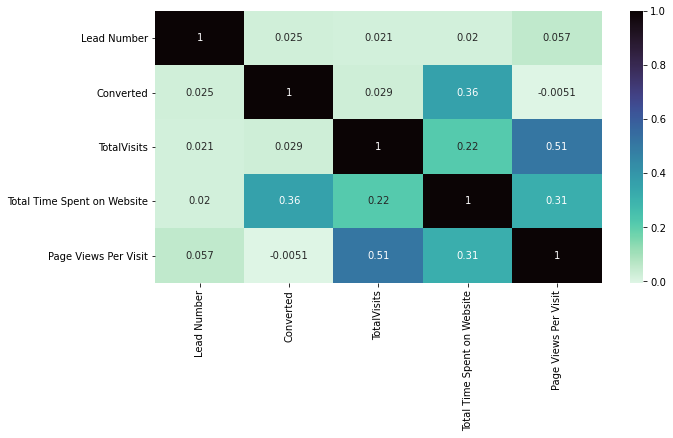

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_continuous_numerical, cmap='mako_r', annot= True)
plt.show()

The correlation between Total Visits and Page Views Per Visit is the highest. There is a positive correlation between all the variables expect between Page Views Per Visit and Converted which has a negative correlation. A positive correlation implies that as the value of one variable increases, the value of the other variable also increases. A negative correlation implies that when the value of one of these variables increases, the value of the other variable decreases.

In [40]:
#Dropping columns that are of no use for analysis. 
lead = lead.drop(['Magazine', 'Receive More Updates About Our Courses', 'Do Not Call', 'Update me on Supply Chain Content','Get updates on DM Content','Newspaper Article','X Education Forums','Newspaper','I agree to pay the amount through cheque','Digital Advertisement', 'Through Recommendations','Search','Prospect ID','Country','Last Activity','Last Notable Activity'], axis=1)

# 4. CREATING DUMMY VARIABLES

In [41]:
#To get columns that are of the data type- OBJECT
variable_list=lead.loc[:,lead.dtypes == 'object']
variable_list.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [42]:
#Creating Dummy variables
dummy_creation=pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization','What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview']], drop_first=True)

In [43]:
#Adding dummies created to the dataset
lead=pd.concat([lead,dummy_creation], axis=1)

In [44]:
#Dropping varibales for which the dummy varaiables were created
lead=lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email','Specialization', 'What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview'], 1)
lead.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,A free copy of Mastering The Interview_Yes
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,660719,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
lead.shape

(9240, 59)

# 5. TEST TRAIN SPLIT

In [46]:
#Assigning all predictor variables to 'X'
X=lead.drop(['Converted'], 1)
#Assigning the target varibale to 'y'
y=lead['Converted']

In [47]:
#Splitting the dataset into train and test set for linear regression.
#70% of the data will be used as train set and 30% of the data will be used as the test set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=65)

# 6.  RESCALING / STANDARDISATION

In [48]:
X_train.describe()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,A free copy of Mastering The Interview_Yes
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000
mean,617143.670377,3.448980,494.091991,2.358986,0.532622,0.079468,0.005257,0.000155,0.273191,0.005257,0.315244,0.000309,0.000155,0.190322,0.124768,0.000155,0.000309,0.059524,0.013296,0.0,0.0,0.015461,0.000464,0.000155,0.000464,0.000155,0.000155,0.000155,0.078695,0.041899,0.005566,0.012214,0.106370,0.016852,0.012369,0.093228,0.036487,0.019326,0.090445,0.020872,0.056895,0.011596,0.008040,0.212276,0.004638,0.040043,0.021181,0.153370,0.001237,0.001701,0.022109,0.604360,0.076994,0.292517,0.000155,0.0,0.294372,0.316481
std,23367.320490,5.026452,552.581866,2.100967,0.498973,0.270489,0.072318,0.012434,0.445633,0.072318,0.464649,0.017583,0.012434,0.392585,0.330481,0.012434,0.017583,0.236621,0.114549,0.0,0.0,0.123386,0.021533,0.012434,0.021533,0.012434,0.012434,0.012434,0.269283,0.200373,0.074403,0.109848,0.308334,0.128727,0.110533,0.290774,0.187514,0.137678,0.286841,0.142967,0.231661,0.107065,0.089309,0.408951,0.067952,0.196076,0.143999,0.360372,0.035150,0.041207,0.147049,0.489026,0.266603,0.454954,0.012434,0.0,0.455795,0.465139
min,579538.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

The minimum and the maximum values of all the categorical and discrete numerical variables are between 0 and 1 implying that they are all on the same scale however in case of the continuous numerical variables, the minimum and maximum values are not between 0 and 1 this could have an impact on the coefficient values of these variables hence standardisation is necessary in this case.

In [49]:
#Scalling the variables 
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head(100)

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,A free copy of Mastering The Interview_Yes
8922,581941,0.031873,0.177267,0.083333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
122,659263,0.011952,0.544429,0.062500,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5028,611560,0.019920,0.237709,0.208333,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6262,601790,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8762,582963,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,598730,0.011952,0.152458,0.125000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6138,602684,0.015936,0.368065,0.166667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4383,617738,0.023904,0.238611,0.250000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
836,651660,0.011952,0.621561,0.083333,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# 7. BUILDING THE MODEL

# A Model with all variables
# Model 1

In [50]:
#Running a model with all variables
logistic_model_1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logistic_model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6412
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2833.6
Date:                Sat, 08 Jan 2022   Deviance:                       5667.1
Time:                        19:13:49   Pearson chi2:                 7.45e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      18.3590    4.1e+04      0.000      1.000   -8.03e+04    8.04e+04
Lead Number                                                              2.964e-06   1.48e-06      2.009      0.045    7.21e-08    5.86e-06
TotalVisits                                                                 6.0181      2.264      2.659      0.008       1.581      10.455
Total Time Spent on Website                                                 4.4083      0.157     28.063      0.000       4.100       4.716
Page Views Per Visit                                                       -0.4700      0.546     -0.860      0.390      -1.541       0.601
Lead Origin_Landing Page Submission                                        -0.5208      0.135     -3.855      0.000      -0.786      -0.256
Lead Origin_Lead Add Form                                                   3.2973      0.554      5.947      0.000       2.211       4.384
Lead Origin_Lead Import                                                    -0.3499      2.230     -0.157      0.875      -4.721       4.021
Lead Origin_Quick Add Form                                                 21.2578   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                                                -20.3582    4.1e+04     -0.000      1.000   -8.04e+04    8.03e+04
Lead Source_Facebook                                                      -20.3848    4.1e+04     -0.000      1.000   -8.04e+04    8.03e+04
Lead Source_Google                                                        -20.1062    4.1e+04     -0.000      1.000   -8.04e+04    8.03e+04
Lead Source_Live Chat                                                       1.8404   6.96e+04   2.65e-05      1.000   -1.36e+05    1.36e+05
Lead Source_NC_EDM                                                          4.3342   8.85e+04    4.9e-05      1.000   -1.74e+05    1.74e+05
Lead Source_Olark Chat                                                    -19.1973    4.1e+04     -0.000      1.000   -8.04e+04    8.03e+04
Lead Source_Organic Search                                                -20.1092    4.1e+04     -0.000      1.000   -8.04e+04    8.03e+04
Lead Source_Pay per Click Ads                                             -42.3938   8.66e+04     -0.000      1.000    -1.7e+05     1.7e+05
Lead Source_Press_Release                                                 -41.5058   6.93e+04     -0.001      1.000   -1.36e+05    1.36e+05
Lead Source_Reference                                                     -20.1579    4.1e+04     -0.000      1.000   -8.04e+04    8.03e+04
Lea

In [51]:
logistic_reg=LogisticRegression()

In [52]:
#Running RFE with 15 variables
rfe=RFE(logistic_reg,25)
rfe = rfe.fit(X_train, y_train)

In [53]:
#Variables that have been selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 20),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 17),
 ('Lead Source_NC_EDM', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 26),
 ('Lead Source_Press_Release', False, 18),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 32),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 30),
 ('Lead Source_blog', False, 27),
 ('Lead Source_google', False, 16),
 ('Lead Source_testone', 

In [54]:
#Variables that are not included in the model
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'What is your curr

In [55]:
#Putting the variables into 'cols'
cols= X_train.columns[rfe.support_]
X_train1=X_train[cols]
X_train1.columns

Index(['Lead Number', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Select',
       'Specialization_Travel and Tourism', 'Specialization_not provided',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided',
       'What matters most to you in choosing a course_not provided',
       'A free copy of Mastering The Interview_Yes'],
      dtype='object')

# Rebuilding the Model

In [56]:
#Re-running the model
#MODEL 2 
X_train_sm=sm.add_constant(X_train1)
logistic_model_2=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.7
Date:                Sat, 08 Jan 2022   Deviance:                       5719.5
Time:                        19:13:49   Pearson chi2:                 7.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -3.2163      1.042     -3.085      0.002      -5.259      -1.173
Lead Number                                                 2.791e-06   1.47e-06      1.905      0.057   -8.11e-08    5.66e-06
Total Time Spent on Website                                    4.3902      0.156     28.165      0.000       4.085       4.696
Page Views Per Visit                                           0.0640      0.501      0.128      0.898      -0.917       1.045
Lead Origin_Landing Page Submission                           -0.5246      0.133     -3.932      0.000      -0.786      -0.263
Lead Origin_Lead Add Form                                      3.4307      0.539      6.365      0.000       2.374       4.487
Lead Source_Direct Traffic                                     0.1732      0.421      0.411      0.681      -0.653       0.999
Lead Source_Google                                             0.4180      0.412      1.014      0.310      -0.390       1.226
Lead Source_Olark Chat                                         1.2935      0.417      3.105      0.002       0.477       2.110
Lead Source_Organic Search                                     0.4171      0.422      0.988      0.323      -0.410       1.244
Lead Source_Reference                                          0.1565      0.671      0.233      0.815      -1.158       1.471
Lead Source_Referral Sites                                    -0.3539      0.536     -0.660      0.509      -1.405       0.697
Lead Source_Welingak Website                                   3.3213      1.192      2.787      0.005       0.986       5.657
Do Not Email_Yes                                              -1.2531      0.161     -7.786      0.000      -1.569      -0.938
Specialization_Finance Management                              0.0841      0.118      0.709      0.478      -0.148       0.316
Specialization_Human Resource Management                       0.0048      0.123      0.039      0.969      -0.237       0.246
Specialization_Marketing Management                            0.0075      0.126      0.059      0.953      -0.239       0.254
Specialization_Operations Management                          -0.0165      0.151     -0.109      0.913      -0.313       0.280
Specialization_Select                                         -0.7144      0.137     -5.209      0.000      -0.983      -0.446
Specialization_Travel and Tourism                             -0.2501      0.241     -1.035      0.300      -0.723       0.223
Specialization_not provided                                   -0.9164      0.193     -4.758      0.000      -1.294      -0.539
What is your current occupation_Une

In [57]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,What matters most to you in choosing a course_...,179.61
22,What is your current occupation_not provided,166.42
0,Lead Number,136.31
6,Lead Source_Google,33.89
5,Lead Source_Direct Traffic,30.43
20,What is your current occupation_Unemployed,24.78
7,Lead Source_Olark Chat,20.45
9,Lead Source_Reference,18.92
4,Lead Origin_Lead Add Form,18.60
8,Lead Source_Organic Search,14.13


The variable - What matters most to you in a course_not provided has a p-value greater than 0.05 and had a VIF value that is greater than 5 . Hence we can drop that variable

In [58]:
#Dropping the variable
X_train1.drop('What matters most to you in choosing a course_not provided', axis = 1, inplace = True)

In [59]:
#Re-running the model
#MODEL 3
X_train_sm=sm.add_constant(X_train1)
logistic_model_3=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.9
Date:                Sat, 08 Jan 2022   Deviance:                       5723.8
Time:                        19:13:50   Pearson chi2:                 7.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2016      1.042     -3.072      0.002      -5.244      -1.159
Lead Number                                           2.723e-06   1.46e-06      1.859      0.063   -1.48e-07    5.59e-06
Total Time Spent on Website                              4.3879      0.156     28.180      0.000       4.083       4.693
Page Views Per Visit                                     0.0696      0.500      0.139      0.889      -0.911       1.050
Lead Origin_Landing Page Submission                     -0.5497      0.133     -4.146      0.000      -0.810      -0.290
Lead Origin_Lead Add Form                                3.4352      0.540      6.365      0.000       2.377       4.493
Lead Source_Direct Traffic                               0.1680      0.422      0.398      0.690      -0.658       0.994
Lead Source_Google                                       0.4238      0.412      1.028      0.304      -0.384       1.232
Lead Source_Olark Chat                                   1.3000      0.417      3.119      0.002       0.483       2.117
Lead Source_Organic Search                               0.4192      0.422      0.993      0.321      -0.408       1.247
Lead Source_Reference                                    0.1501      0.671      0.224      0.823      -1.165       1.466
Lead Source_Referral Sites                              -0.3467      0.536     -0.647      0.518      -1.398       0.704
Lead Source_Welingak Website                             3.3228      1.192      2.787      0.005       0.986       5.659
Do Not Email_Yes                                        -1.2735      0.160     -7.936      0.000      -1.588      -0.959
Specialization_Finance Management                        0.0841      0.118      0.710      0.478      -0.148       0.316
Specialization_Human Resource Management                 0.0031      0.123      0.026      0.980      -0.238       0.245
Specialization_Marketing Management                      0.0060      0.126      0.048      0.962      -0.240       0.252
Specialization_Operations Management                    -0.0166      0.151     -0.110      0.913      -0.313       0.280
Specialization_Select                                   -0.7318      0.137     -5.350      0.000      -1.000      -0.464
Specialization_Travel and Tourism                       -0.2517      0.242     -1.042      0.297      -0.725       0.222
Specialization_not provided                             -0.9781      0.189     -5.176      0.000      -1.348      -0.608
What is your current occupation_Unemployed               0.1291      0.195      0.660      0.509      -0.254       0.512
What is your current occupation_Working Professional     2

In [60]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,135.32
6,Lead Source_Google,33.89
5,Lead Source_Direct Traffic,30.42
20,What is your current occupation_Unemployed,23.57
7,Lead Source_Olark Chat,20.45
9,Lead Source_Reference,18.92
4,Lead Origin_Lead Add Form,18.60
8,Lead Source_Organic Search,14.13
22,What is your current occupation_not provided,13.18
3,Lead Origin_Landing Page Submission,8.79


The variable Lead Source Google can be dropped due to high VIF value i.e. the VIF value is greater than 5 and insignificant p-value. 

In [61]:
#Dropping the variable 
X_train1.drop('Lead Source_Google', axis = 1, inplace = True)

In [62]:
#Re-running the model
#MODEL 4
X_train_sm=sm.add_constant(X_train1)
logistic_model_4=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.5
Date:                Sat, 08 Jan 2022   Deviance:                       5724.9
Time:                        19:13:50   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7288      0.937     -2.913      0.004      -4.565      -0.893
Lead Number                                           2.606e-06   1.46e-06      1.784      0.074   -2.57e-07    5.47e-06
Total Time Spent on Website                              4.3992      0.155     28.299      0.000       4.095       4.704
Page Views Per Visit                                     0.0949      0.499      0.190      0.849      -0.884       1.073
Lead Origin_Landing Page Submission                     -0.5389      0.132     -4.084      0.000      -0.798      -0.280
Lead Origin_Lead Add Form                                3.4069      0.541      6.297      0.000       2.346       4.467
Lead Source_Direct Traffic                              -0.2501      0.109     -2.304      0.021      -0.463      -0.037
Lead Source_Olark Chat                                   0.8943      0.128      6.988      0.000       0.643       1.145
Lead Source_Organic Search                               0.0029      0.117      0.025      0.980      -0.226       0.232
Lead Source_Reference                                   -0.2251      0.570     -0.395      0.693      -1.341       0.891
Lead Source_Referral Sites                              -0.7573      0.357     -2.123      0.034      -1.457      -0.058
Lead Source_Welingak Website                             2.9462      1.137      2.590      0.010       0.717       5.175
Do Not Email_Yes                                        -1.2729      0.160     -7.936      0.000      -1.587      -0.959
Specialization_Finance Management                        0.0849      0.118      0.717      0.473      -0.147       0.317
Specialization_Human Resource Management                 0.0044      0.123      0.036      0.971      -0.237       0.246
Specialization_Marketing Management                      0.0095      0.126      0.075      0.940      -0.237       0.256
Specialization_Operations Management                    -0.0180      0.151     -0.119      0.905      -0.314       0.278
Specialization_Select                                   -0.7282      0.136     -5.336      0.000      -0.996      -0.461
Specialization_Travel and Tourism                       -0.2538      0.241     -1.051      0.293      -0.727       0.219
Specialization_not provided                             -0.9700      0.189     -5.140      0.000      -1.340      -0.600
What is your current occupation_Unemployed               0.1293      0.195      0.662      0.508      -0.254       0.512
What is your current occupation_Working Professional     2.4520      0.259      9.453      0.000       1.944       2.960
What is your current occupation_not provided            -1

In [63]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,55.43
19,What is your current occupation_Unemployed,23.41
4,Lead Origin_Lead Add Form,18.49
8,Lead Source_Reference,14.63
21,What is your current occupation_not provided,13.12
3,Lead Origin_Landing Page Submission,8.68
10,Lead Source_Welingak Website,4.47
18,Specialization_not provided,4.29
2,Page Views Per Visit,4.23
20,What is your current occupation_Working Profes...,3.93


The variable Lead Number can be dropped due to high VIF value i.e. the VIF value is greater than 5 and insignificant p-value

In [64]:
#Dropping the variable
X_train1.drop('Lead Number', axis = 1, inplace = True)

In [65]:
#Re-running the model
#MODEL 5
X_train_sm=sm.add_constant(X_train1)
logistic_model_5=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.1
Date:                Sat, 08 Jan 2022   Deviance:                       5728.1
Time:                        19:13:50   Pearson chi2:                 7.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1160      0.244     -4.580      0.000      -1.594      -0.638
Total Time Spent on Website                              4.3983      0.155     28.302      0.000       4.094       4.703
Page Views Per Visit                                     0.1224      0.499      0.245      0.806      -0.855       1.100
Lead Origin_Landing Page Submission                     -0.5500      0.132     -4.173      0.000      -0.808      -0.292
Lead Origin_Lead Add Form                                3.3887      0.541      6.268      0.000       2.329       4.448
Lead Source_Direct Traffic                              -0.2703      0.108     -2.504      0.012      -0.482      -0.059
Lead Source_Olark Chat                                   0.8706      0.127      6.843      0.000       0.621       1.120
Lead Source_Organic Search                              -0.0142      0.116     -0.122      0.903      -0.242       0.214
Lead Source_Reference                                   -0.2116      0.569     -0.372      0.710      -1.327       0.904
Lead Source_Referral Sites                              -0.6877      0.356     -1.934      0.053      -1.385       0.009
Lead Source_Welingak Website                             2.9489      1.137      2.593      0.010       0.720       5.178
Do Not Email_Yes                                        -1.2870      0.160     -8.033      0.000      -1.601      -0.973
Specialization_Finance Management                        0.0889      0.118      0.751      0.452      -0.143       0.321
Specialization_Human Resource Management                -0.0005      0.123     -0.004      0.997      -0.242       0.241
Specialization_Marketing Management                      0.0115      0.126      0.091      0.927      -0.235       0.258
Specialization_Operations Management                    -0.0192      0.151     -0.127      0.899      -0.315       0.277
Specialization_Select                                   -0.7281      0.136     -5.338      0.000      -0.995      -0.461
Specialization_Travel and Tourism                       -0.2476      0.241     -1.027      0.304      -0.720       0.225
Specialization_not provided                             -0.9792      0.189     -5.188      0.000      -1.349      -0.609
What is your current occupation_Unemployed               0.1403      0.195      0.720      0.472      -0.242       0.522
What is your current occupation_Working Professional     2.4597      0.259      9.490      0.000       1.952       2.968
What is your current occupation_not provided            -1.0442      0.216     -4.841      0.000      -1.467      -0.621
A free copy of Mastering The Interview_Yes              -0

In [66]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,18.43
7,Lead Source_Reference,14.57
18,What is your current occupation_Unemployed,9.27
2,Lead Origin_Landing Page Submission,7.51
20,What is your current occupation_not provided,6.26
9,Lead Source_Welingak Website,4.47
1,Page Views Per Visit,4.06
17,Specialization_not provided,3.86
21,A free copy of Mastering The Interview_Yes,3.26
15,Specialization_Select,3.15


The variable Lead source reference can be dropped due to high VIF value and insignificant p-value. 

In [67]:
#Dropping the variable
X_train1.drop('Lead Source_Reference', axis = 1, inplace = True)

In [68]:
#Re-running the model
#MODEL 6
X_train_sm=sm.add_constant(X_train1)
logistic_model_6=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.1
Date:                Sat, 08 Jan 2022   Deviance:                       5728.3
Time:                        19:13:51   Pearson chi2:                 7.71e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1210      0.243     -4.606      0.000      -1.598      -0.644
Total Time Spent on Website                              4.3984      0.155     28.306      0.000       4.094       4.703
Page Views Per Visit                                     0.1255      0.499      0.252      0.801      -0.852       1.103
Lead Origin_Landing Page Submission                     -0.5473      0.132     -4.158      0.000      -0.805      -0.289
Lead Origin_Lead Add Form                                3.2061      0.218     14.674      0.000       2.778       3.634
Lead Source_Direct Traffic                              -0.2708      0.108     -2.510      0.012      -0.482      -0.059
Lead Source_Olark Chat                                   0.8707      0.127      6.845      0.000       0.621       1.120
Lead Source_Organic Search                              -0.0148      0.116     -0.127      0.899      -0.243       0.213
Lead Source_Referral Sites                              -0.6883      0.356     -1.935      0.053      -1.385       0.009
Lead Source_Welingak Website                             3.1289      1.027      3.046      0.002       1.116       5.142
Do Not Email_Yes                                        -1.2801      0.159     -8.060      0.000      -1.591      -0.969
Specialization_Finance Management                        0.0892      0.118      0.753      0.451      -0.143       0.321
Specialization_Human Resource Management                -0.0006      0.123     -0.005      0.996      -0.242       0.241
Specialization_Marketing Management                      0.0114      0.126      0.090      0.928      -0.235       0.258
Specialization_Operations Management                    -0.0189      0.151     -0.125      0.900      -0.315       0.277
Specialization_Select                                   -0.7236      0.136     -5.325      0.000      -0.990      -0.457
Specialization_Travel and Tourism                       -0.2477      0.241     -1.027      0.304      -0.720       0.225
Specialization_not provided                             -0.9761      0.189     -5.176      0.000      -1.346      -0.607
What is your current occupation_Unemployed               0.1416      0.195      0.726      0.468      -0.241       0.524
What is your current occupation_Working Professional     2.4603      0.259      9.491      0.000       1.952       2.968
What is your current occupation_not provided            -1.0427      0.216     -4.833      0.000      -1.466      -0.620
A free copy of Mastering The Interview_Yes              -0.1297      0.103     -1.260      0.208      -0.331       0.072
==========================================================

In [69]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,9.25
2,Lead Origin_Landing Page Submission,7.49
19,What is your current occupation_not provided,6.25
1,Page Views Per Visit,4.06
16,Specialization_not provided,3.85
20,A free copy of Mastering The Interview_Yes,3.26
14,Specialization_Select,3.13
4,Lead Source_Direct Traffic,3.06
5,Lead Source_Olark Chat,2.52
0,Total Time Spent on Website,2.21


The variable What is your current occupation_Unemployed can be dropped due to high VIF and insignificant p-value

In [70]:
#Dropping the variable
X_train1.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [71]:
#Re-running the model
#MODEL 7
X_train_sm=sm.add_constant(X_train1)
logistic_model_7=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.4
Date:                Sat, 08 Jan 2022   Deviance:                       5728.8
Time:                        19:13:51   Pearson chi2:                 7.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9842      0.154     -6.385      0.000      -1.286      -0.682
Total Time Spent on Website                              4.3964      0.155     28.304      0.000       4.092       4.701
Page Views Per Visit                                     0.1305      0.499      0.262      0.793      -0.847       1.108
Lead Origin_Landing Page Submission                     -0.5473      0.132     -4.159      0.000      -0.805      -0.289
Lead Origin_Lead Add Form                                3.2037      0.218     14.663      0.000       2.775       3.632
Lead Source_Direct Traffic                              -0.2742      0.108     -2.544      0.011      -0.486      -0.063
Lead Source_Olark Chat                                   0.8669      0.127      6.822      0.000       0.618       1.116
Lead Source_Organic Search                              -0.0160      0.116     -0.138      0.891      -0.244       0.212
Lead Source_Referral Sites                              -0.6863      0.356     -1.930      0.054      -1.383       0.011
Lead Source_Welingak Website                             3.1350      1.027      3.052      0.002       1.122       5.148
Do Not Email_Yes                                        -1.2791      0.159     -8.057      0.000      -1.590      -0.968
Specialization_Finance Management                        0.0886      0.118      0.748      0.454      -0.143       0.321
Specialization_Human Resource Management             -3.328e-05      0.123     -0.000      1.000      -0.241       0.241
Specialization_Marketing Management                      0.0119      0.126      0.095      0.925      -0.234       0.258
Specialization_Operations Management                    -0.0171      0.151     -0.113      0.910      -0.313       0.279
Specialization_Select                                   -0.7228      0.136     -5.319      0.000      -0.989      -0.456
Specialization_Travel and Tourism                       -0.2452      0.241     -1.018      0.309      -0.717       0.227
Specialization_not provided                             -0.9769      0.188     -5.185      0.000      -1.346      -0.608
What is your current occupation_Working Professional     2.3241      0.179     12.990      0.000       1.973       2.675
What is your current occupation_not provided            -1.1778      0.109    -10.803      0.000      -1.391      -0.964
A free copy of Mastering The Interview_Yes              -0.1282      0.103     -1.246      0.213      -0.330       0.074
========================================================================================================================
"""

In [72]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,5.37
1,Page Views Per Visit,3.73
19,A free copy of Mastering The Interview_Yes,3.24
16,Specialization_not provided,3.14
4,Lead Source_Direct Traffic,3.05
18,What is your current occupation_not provided,2.77
5,Lead Source_Olark Chat,2.12
0,Total Time Spent on Website,2.08
14,Specialization_Select,1.91
6,Lead Source_Organic Search,1.67


Specialization_Human Resource Management can be dropped due to a highly insignificant p-value.

In [73]:
#Dropping the variable
X_train1.drop('Specialization_Human Resource Management', axis = 1, inplace = True)

In [74]:
#Re-running the model
#MODEL 8 
X_train_sm=sm.add_constant(X_train1)
logistic_model_8=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.4
Date:                Sat, 08 Jan 2022   Deviance:                       5728.8
Time:                        19:13:51   Pearson chi2:                 7.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9842      0.150     -6.573      0.000      -1.278      -0.691
Total Time Spent on Website                              4.3964      0.155     28.306      0.000       4.092       4.701
Page Views Per Visit                                     0.1305      0.498      0.262      0.793      -0.846       1.108
Lead Origin_Landing Page Submission                     -0.5473      0.132     -4.159      0.000      -0.805      -0.289
Lead Origin_Lead Add Form                                3.2037      0.218     14.663      0.000       2.775       3.632
Lead Source_Direct Traffic                              -0.2742      0.108     -2.545      0.011      -0.485      -0.063
Lead Source_Olark Chat                                   0.8669      0.127      6.822      0.000       0.618       1.116
Lead Source_Organic Search                              -0.0160      0.116     -0.138      0.890      -0.244       0.212
Lead Source_Referral Sites                              -0.6863      0.356     -1.930      0.054      -1.383       0.011
Lead Source_Welingak Website                             3.1350      1.027      3.052      0.002       1.122       5.148
Do Not Email_Yes                                        -1.2791      0.159     -8.058      0.000      -1.590      -0.968
Specialization_Finance Management                        0.0886      0.114      0.780      0.436      -0.134       0.311
Specialization_Marketing Management                      0.0119      0.121      0.098      0.922      -0.225       0.249
Specialization_Operations Management                    -0.0170      0.147     -0.116      0.908      -0.306       0.272
Specialization_Select                                   -0.7228      0.131     -5.501      0.000      -0.980      -0.465
Specialization_Travel and Tourism                       -0.2452      0.239     -1.026      0.305      -0.714       0.223
Specialization_not provided                             -0.9769      0.185     -5.292      0.000      -1.339      -0.615
What is your current occupation_Working Professional     2.3241      0.179     12.990      0.000       1.973       2.675
What is your current occupation_not provided            -1.1778      0.109    -10.807      0.000      -1.391      -0.964
A free copy of Mastering The Interview_Yes              -0.1282      0.103     -1.247      0.213      -0.330       0.073
========================================================================================================================
"""

Specialization_Marketing Management can be dropped due to a highly insignificant p-value.

In [75]:
#Dropping the variable
X_train1.drop('Specialization_Marketing Management', axis = 1, inplace = True)

In [76]:
#Re-running the model
#MODEL 9
X_train_sm=sm.add_constant(X_train1)
logistic_model_9=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_9.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.4
Date:                Sat, 08 Jan 2022   Deviance:                       5728.8
Time:                        19:13:51   Pearson chi2:                 7.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9808      0.146     -6.730      0.000      -1.266      -0.695
Total Time Spent on Website                              4.3963      0.155     28.307      0.000       4.092       4.701
Page Views Per Visit                                     0.1298      0.498      0.260      0.794      -0.847       1.107
Lead Origin_Landing Page Submission                     -0.5478      0.131     -4.167      0.000      -0.806      -0.290
Lead Origin_Lead Add Form                                3.2037      0.218     14.663      0.000       2.775       3.632
Lead Source_Direct Traffic                              -0.2741      0.108     -2.545      0.011      -0.485      -0.063
Lead Source_Olark Chat                                   0.8667      0.127      6.822      0.000       0.618       1.116
Lead Source_Organic Search                              -0.0164      0.116     -0.141      0.887      -0.244       0.211
Lead Source_Referral Sites                              -0.6864      0.356     -1.930      0.054      -1.383       0.010
Lead Source_Welingak Website                             3.1348      1.027      3.052      0.002       1.122       5.148
Do Not Email_Yes                                        -1.2796      0.159     -8.065      0.000      -1.591      -0.969
Specialization_Finance Management                        0.0862      0.111      0.777      0.437      -0.131       0.303
Specialization_Operations Management                    -0.0194      0.145     -0.134      0.894      -0.304       0.266
Specialization_Select                                   -0.7259      0.127     -5.695      0.000      -0.976      -0.476
Specialization_Travel and Tourism                       -0.2473      0.238     -1.038      0.299      -0.714       0.219
Specialization_not provided                             -0.9798      0.182     -5.380      0.000      -1.337      -0.623
What is your current occupation_Working Professional     2.3240      0.179     12.990      0.000       1.973       2.675
What is your current occupation_not provided            -1.1779      0.109    -10.809      0.000      -1.392      -0.964
A free copy of Mastering The Interview_Yes              -0.1288      0.103     -1.255      0.210      -0.330       0.072
========================================================================================================================
"""

Specialization_Operations Management can be dropped due to a highly insignificant p-value.

In [77]:
#Dropping the variable
X_train1.drop('Specialization_Operations Management', axis = 1, inplace = True)

In [78]:
#Re-running the model
#MODEL 10
X_train_sm=sm.add_constant(X_train1)
logistic_model_10=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_10.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.4
Date:                Sat, 08 Jan 2022   Deviance:                       5728.8
Time:                        19:13:51   Pearson chi2:                 7.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9828      0.145     -6.779      0.000      -1.267      -0.699
Total Time Spent on Website                              4.3961      0.155     28.307      0.000       4.092       4.700
Page Views Per Visit                                     0.1318      0.498      0.265      0.791      -0.845       1.108
Lead Origin_Landing Page Submission                     -0.5482      0.131     -4.170      0.000      -0.806      -0.291
Lead Origin_Lead Add Form                                3.2041      0.218     14.666      0.000       2.776       3.632
Lead Source_Direct Traffic                              -0.2743      0.108     -2.546      0.011      -0.485      -0.063
Lead Source_Olark Chat                                   0.8668      0.127      6.823      0.000       0.618       1.116
Lead Source_Organic Search                              -0.0167      0.116     -0.144      0.886      -0.244       0.211
Lead Source_Referral Sites                              -0.6863      0.356     -1.930      0.054      -1.383       0.010
Lead Source_Welingak Website                             3.1345      1.027      3.052      0.002       1.122       5.148
Do Not Email_Yes                                        -1.2793      0.159     -8.064      0.000      -1.590      -0.968
Specialization_Finance Management                        0.0883      0.110      0.805      0.421      -0.127       0.303
Specialization_Select                                   -0.7240      0.127     -5.716      0.000      -0.972      -0.476
Specialization_Travel and Tourism                       -0.2451      0.238     -1.032      0.302      -0.711       0.220
Specialization_not provided                             -0.9779      0.182     -5.387      0.000      -1.334      -0.622
What is your current occupation_Working Professional     2.3233      0.179     12.991      0.000       1.973       2.674
What is your current occupation_not provided            -1.1780      0.109    -10.810      0.000      -1.392      -0.964
A free copy of Mastering The Interview_Yes              -0.1287      0.103     -1.254      0.210      -0.330       0.072
========================================================================================================================
"""

Lead Source_Organic Search can be dropped due to a highly insignificant p-value.

In [79]:
#Dropping the variable
X_train1.drop('Lead Source_Organic Search', axis = 1, inplace = True)

In [80]:
#Re-running the model
#MODEL 11
X_train_sm=sm.add_constant(X_train1)
logistic_model_11=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_11.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.4
Date:                Sat, 08 Jan 2022   Deviance:                       5728.8
Time:                        19:13:51   Pearson chi2:                 7.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9848      0.144     -6.822      0.000      -1.268      -0.702
Total Time Spent on Website                              4.3963      0.155     28.310      0.000       4.092       4.701
Page Views Per Visit                                     0.1173      0.488      0.240      0.810      -0.839       1.073
Lead Origin_Landing Page Submission                     -0.5468      0.131     -4.170      0.000      -0.804      -0.290
Lead Origin_Lead Add Form                                3.2072      0.217     14.749      0.000       2.781       3.633
Lead Source_Direct Traffic                              -0.2679      0.098     -2.732      0.006      -0.460      -0.076
Lead Source_Olark Chat                                   0.8704      0.125      6.987      0.000       0.626       1.115
Lead Source_Referral Sites                              -0.6801      0.353     -1.928      0.054      -1.372       0.011
Lead Source_Welingak Website                             3.1352      1.027      3.053      0.002       1.122       5.148
Do Not Email_Yes                                        -1.2799      0.159     -8.070      0.000      -1.591      -0.969
Specialization_Finance Management                        0.0889      0.110      0.811      0.418      -0.126       0.304
Specialization_Select                                   -0.7257      0.126     -5.752      0.000      -0.973      -0.478
Specialization_Travel and Tourism                       -0.2481      0.237     -1.048      0.295      -0.712       0.216
Specialization_not provided                             -0.9801      0.181     -5.419      0.000      -1.335      -0.626
What is your current occupation_Working Professional     2.3231      0.179     12.990      0.000       1.973       2.674
What is your current occupation_not provided            -1.1774      0.109    -10.812      0.000      -1.391      -0.964
A free copy of Mastering The Interview_Yes              -0.1339      0.096     -1.394      0.163      -0.322       0.054
========================================================================================================================
"""

Page Views Per Visit can be dropped due to a highly insignificant p-value.

In [81]:
#Dropping the variable
X_train1.drop('Page Views Per Visit', axis = 1, inplace = True)

In [82]:
#Re-running the model
#MODEL 12 
X_train_sm=sm.add_constant(X_train1)
logistic_model_12=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_12.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.4
Date:                Sat, 08 Jan 2022   Deviance:                       5728.9
Time:                        19:13:51   Pearson chi2:                 7.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9710      0.133     -7.326      0.000      -1.231      -0.711
Total Time Spent on Website                              4.3982      0.155     28.355      0.000       4.094       4.702
Lead Origin_Landing Page Submission                     -0.5436      0.130     -4.167      0.000      -0.799      -0.288
Lead Origin_Lead Add Form                                3.1951      0.212     15.104      0.000       2.780       3.610
Lead Source_Direct Traffic                              -0.2729      0.096     -2.850      0.004      -0.461      -0.085
Lead Source_Olark Chat                                   0.8588      0.115      7.484      0.000       0.634       1.084
Lead Source_Referral Sites                              -0.6756      0.352     -1.919      0.055      -1.366       0.015
Lead Source_Welingak Website                             3.1352      1.027      3.053      0.002       1.122       5.148
Do Not Email_Yes                                        -1.2796      0.159     -8.069      0.000      -1.590      -0.969
Specialization_Finance Management                        0.0884      0.110      0.807      0.420      -0.126       0.303
Specialization_Select                                   -0.7272      0.126     -5.771      0.000      -0.974      -0.480
Specialization_Travel and Tourism                       -0.2448      0.236     -1.036      0.300      -0.708       0.218
Specialization_not provided                             -0.9830      0.180     -5.448      0.000      -1.337      -0.629
What is your current occupation_Working Professional     2.3238      0.179     12.995      0.000       1.973       2.674
What is your current occupation_not provided            -1.1767      0.109    -10.810      0.000      -1.390      -0.963
A free copy of Mastering The Interview_Yes              -0.1319      0.096     -1.378      0.168      -0.320       0.056
========================================================================================================================
"""

Specialization_Finance Management can be dropped due to a highly insignificant p-value.

In [83]:
#Dropping the variable
X_train1.drop('Specialization_Finance Management', axis = 1, inplace = True)

In [84]:
#Re-running the model
#MODEL 13
X_train_sm=sm.add_constant(X_train1)
logistic_model_13=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_13.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.8
Date:                Sat, 08 Jan 2022   Deviance:                       5729.5
Time:                        19:13:51   Pearson chi2:                 7.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9560      0.131     -7.286      0.000      -1.213      -0.699
Total Time Spent on Website                              4.3965      0.155     28.357      0.000       4.093       4.700
Lead Origin_Landing Page Submission                     -0.5420      0.130     -4.155      0.000      -0.798      -0.286
Lead Origin_Lead Add Form                                3.1967      0.212     15.110      0.000       2.782       3.611
Lead Source_Direct Traffic                              -0.2716      0.096     -2.838      0.005      -0.459      -0.084
Lead Source_Olark Chat                                   0.8582      0.115      7.480      0.000       0.633       1.083
Lead Source_Referral Sites                              -0.6789      0.352     -1.928      0.054      -1.369       0.011
Lead Source_Welingak Website                             3.1338      1.027      3.051      0.002       1.121       5.147
Do Not Email_Yes                                        -1.2824      0.158     -8.092      0.000      -1.593      -0.972
Specialization_Select                                   -0.7418      0.125     -5.949      0.000      -0.986      -0.497
Specialization_Travel and Tourism                       -0.2591      0.236     -1.100      0.272      -0.721       0.203
Specialization_not provided                             -0.9983      0.179     -5.565      0.000      -1.350      -0.647
What is your current occupation_Working Professional     2.3253      0.179     13.001      0.000       1.975       2.676
What is your current occupation_not provided            -1.1758      0.109    -10.805      0.000      -1.389      -0.962
A free copy of Mastering The Interview_Yes              -0.1347      0.096     -1.409      0.159      -0.322       0.053
========================================================================================================================
"""

Specialization_Travel and Tourism can be dropped due to a highly insignificant p-value.

In [85]:
#Dropping the variable
X_train1.drop('Specialization_Travel and Tourism', axis = 1, inplace = True)

In [86]:
#Re-running the model
#MODEL 14 
X_train_sm=sm.add_constant(X_train1)
logistic_model_14=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_14.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2865.4
Date:                Sat, 08 Jan 2022   Deviance:                       5730.8
Time:                        19:13:52   Pearson chi2:                 7.71e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9598      0.131     -7.313      0.000      -1.217      -0.703
Total Time Spent on Website                              4.3939      0.155     28.353      0.000       4.090       4.698
Lead Origin_Landing Page Submission                     -0.5439      0.131     -4.168      0.000      -0.800      -0.288
Lead Origin_Lead Add Form                                3.1991      0.212     15.119      0.000       2.784       3.614
Lead Source_Direct Traffic                              -0.2631      0.095     -2.760      0.006      -0.450      -0.076
Lead Source_Olark Chat                                   0.8579      0.115      7.477      0.000       0.633       1.083
Lead Source_Referral Sites                              -0.6813      0.353     -1.932      0.053      -1.372       0.010
Lead Source_Welingak Website                             3.1330      1.027      3.050      0.002       1.120       5.146
Do Not Email_Yes                                        -1.2894      0.158     -8.147      0.000      -1.600      -0.979
Specialization_Select                                   -0.7376      0.125     -5.916      0.000      -0.982      -0.493
Specialization_not provided                             -0.9935      0.179     -5.539      0.000      -1.345      -0.642
What is your current occupation_Working Professional     2.3252      0.179     13.002      0.000       1.975       2.676
What is your current occupation_not provided            -1.1762      0.109    -10.813      0.000      -1.389      -0.963
A free copy of Mastering The Interview_Yes              -0.1446      0.095     -1.519      0.129      -0.331       0.042
========================================================================================================================
"""

A free copy of Mastering The Interview_Yes can be dropped due to a highly insignificant p-value.

In [87]:
#Dropping the variable
X_train1.drop('A free copy of Mastering The Interview_Yes', axis = 1, inplace = True)

In [88]:
#Re-running the model
#MODEL 15
X_train_sm=sm.add_constant(X_train1)
logistic_model_15=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_15.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.5
Date:                Sat, 08 Jan 2022   Deviance:                       5733.1
Time:                        19:13:52   Pearson chi2:                 7.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9859      0.130     -7.577      0.000      -1.241      -0.731
Total Time Spent on Website                              4.3912      0.155     28.346      0.000       4.088       4.695
Lead Origin_Landing Page Submission                     -0.5661      0.130     -4.365      0.000      -0.820      -0.312
Lead Origin_Lead Add Form                                3.2060      0.211     15.164      0.000       2.792       3.620
Lead Source_Direct Traffic                              -0.3304      0.084     -3.912      0.000      -0.496      -0.165
Lead Source_Olark Chat                                   0.8525      0.115      7.435      0.000       0.628       1.077
Lead Source_Referral Sites                              -0.7028      0.353     -1.991      0.046      -1.395      -0.011
Lead Source_Welingak Website                             3.1204      1.027      3.038      0.002       1.107       5.133
Do Not Email_Yes                                        -1.2844      0.158     -8.118      0.000      -1.594      -0.974
Specialization_Select                                   -0.7061      0.123     -5.742      0.000      -0.947      -0.465
Specialization_not provided                             -0.9577      0.178     -5.381      0.000      -1.306      -0.609
What is your current occupation_Working Professional     2.3321      0.179     13.037      0.000       1.982       2.683
What is your current occupation_not provided            -1.1792      0.109    -10.842      0.000      -1.392      -0.966
========================================================================================================================
"""

In [89]:
#Adding the variable TotalVisits to see if the model improves
X_train1['TotalVisits']=X_train['TotalVisits']

In [90]:
#Re-running the model
#MODEL 16
X_train_sm=sm.add_constant(X_train1)
logistic_model_16=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result=logistic_model_16.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.5
Date:                Sat, 08 Jan 2022   Deviance:                       5725.0
Time:                        19:13:52   Pearson chi2:                 7.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0717      0.134     -7.968      0.000      -1.335      -0.808
Total Time Spent on Website                              4.3814      0.155     28.234      0.000       4.077       4.686
Lead Origin_Landing Page Submission                     -0.5766      0.130     -4.442      0.000      -0.831      -0.322
Lead Origin_Lead Add Form                                3.2788      0.214     15.350      0.000       2.860       3.697
Lead Source_Direct Traffic                              -0.3161      0.085     -3.732      0.000      -0.482      -0.150
Lead Source_Olark Chat                                   0.9169      0.118      7.790      0.000       0.686       1.148
Lead Source_Referral Sites                              -0.7325      0.353     -2.072      0.038      -1.425      -0.040
Lead Source_Welingak Website                             3.1196      1.027      3.037      0.002       1.106       5.133
Do Not Email_Yes                                        -1.2998      0.159     -8.183      0.000      -1.611      -0.989
Specialization_Select                                   -0.6892      0.123     -5.594      0.000      -0.931      -0.448
Specialization_not provided                             -0.9347      0.178     -5.240      0.000      -1.284      -0.585
What is your current occupation_Working Professional     2.3366      0.179     13.048      0.000       1.986       2.688
What is your current occupation_not provided            -1.1838      0.109    -10.876      0.000      -1.397      -0.970
TotalVisits                                              4.8465      1.937      2.501      0.012       1.049       8.644
========================================================================================================================
"""

In [91]:
#Checking the VIF values to see if there is any multicolinearity
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.46
9,Specialization_not provided,2.90
11,What is your current occupation_not provided,2.74
0,Total Time Spent on Website,1.96
3,Lead Source_Direct Traffic,1.92
4,Lead Source_Olark Chat,1.86
12,TotalVisits,1.64
8,Specialization_Select,1.59
2,Lead Origin_Lead Add Form,1.44
6,Lead Source_Welingak Website,1.30


The VIF value of all the variables are less than 5 and the p-value of all the variables are less than 0.05. This implies that the model is a good model. 

Hence, MODEL -16 can be considered as the final model

In [92]:
final_vars=['Total Time Spent on Website', 'Lead Origin_Landing Page Submission','Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic','Lead Source_Olark Chat', 'Lead Source_Referral Sites','Lead Source_Welingak Website', 'Do Not Email_Yes','Specialization_Select', 'Specialization_not provided','What is your current occupation_Working Professional','What is your current occupation_not provided', 'TotalVisits']
final_vars

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Direct Traffic',
 'Lead Source_Olark Chat',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Do Not Email_Yes',
 'Specialization_Select',
 'Specialization_not provided',
 'What is your current occupation_Working Professional',
 'What is your current occupation_not provided',
 'TotalVisits']

# 8. MODEL EVALUATION

In [93]:
#Predicting the values of y
y_train_prediction=result.predict(sm.add_constant(X_train1))
y_train_prediction[:10]

8922    0.303704
122     0.664282
5028    0.349139
6262    0.300697
8762    0.093364
9219    0.962062
2760    0.674875
3903    0.717272
5530    0.045579
4689    0.108242
dtype: float64

In [94]:
#Reshaping y_train_pred into an array
y_train_prediction=y_train_prediction.values.reshape(-1)
y_train_prediction[:10]

array([0.30370417, 0.6642816 , 0.34913934, 0.30069732, 0.0933645 ,
       0.96206242, 0.67487513, 0.71727205, 0.04557928, 0.10824172])

Creating a seperate dataframe with the actual converted flag and the predicted probabilities

In [95]:
y_train_prediction_final=pd.DataFrame({'Converted':y_train.values,'Conversion_Probab':y_train_prediction})
y_train_prediction_final['LeadId'] = y_train.index
y_train_prediction_final.head()

,Converted,Conversion_Probab,LeadId
0,0,0.303704,8922
1,1,0.664282,122
2,0,0.349139,5028
3,0,0.300697,6262
4,0,0.093364,8762


Creating a new column 'Predicted' with 1 if Conversion_Probab is greater than 0.5 else 0

In [96]:
y_train_prediction_final['Predicted'] = y_train_prediction_final.Conversion_Probab.map(lambda x: 1 if x > 0.5 else 0)
y_train_prediction_final.head(10)

,Converted,Conversion_Probab,LeadId,Predicted
0,0,0.303704,8922,0
1,1,0.664282,122,1
2,0,0.349139,5028,0
3,0,0.300697,6262,0
4,0,0.093364,8762,0
5,1,0.962062,9219,1
6,1,0.674875,2760,1
7,1,0.717272,3903,1
8,0,0.045579,5530,0
9,0,0.108242,4689,0


In [97]:
#Creating the confusion matrix
confusion = metrics.confusion_matrix(y_train_prediction_final.Converted,y_train_prediction_final.Predicted )
print(confusion)

[[3531  424]
 [ 864 1649]]


In [98]:
#                         Predicted        Not converted    Converted
#                         Actual

#                         Not converted        3531            424
#                         Converted            864            1649

In [99]:
#Checking the overall ACCURACY
print(metrics.accuracy_score(y_train_prediction_final.Converted, y_train_prediction_final.Predicted))

0.8008658008658008


This model has the accuracy of 80% which is a good value but looking just at the accuracy is not enough to assess the goodness of the model. Hence, looking at other metrics.

In [100]:
#True Positive (TP)
TP=confusion[1,1] 

#True Negatives (TN)
TN=confusion[0,0] 

#False Positives (FP)
FP=confusion[0,1] 

#False Negatives (FN)
FN=confusion[1,0]

In [101]:
#Calculating sensitivity
sensitivity=TP/float(TP+FN)
print(sensitivity)

0.6561878233187426


The sensitivity value is 0.65

In [102]:
#Calculating specificity
specificity=TN/float(TN+FP)
print(specificity)

0.8927939317319848


The specificity value is 0.89

# ROC CURVE

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    return None

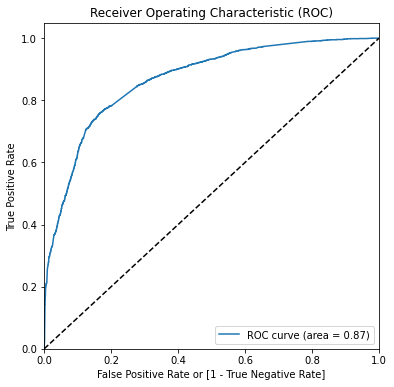

In [104]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_prediction_final.Converted, y_train_prediction_final.Conversion_Probab, drop_intermediate=False)
#Calling the ROC function
draw_roc(y_train_prediction_final.Converted, y_train_prediction_final.Conversion_Probab)

A good classifier is that the curve must be as close to the boundary as possible. Here, the curve is far from the diagonal line is towards the upper-left corner. The area under the curve of the ROC is 0.87 which is a pretty good value and hence the model at hand looks like a good model.

In [105]:
#Creating columns with different probability cut-offs
numbers=[float(x)/10 for x in range(10)]
for n in numbers:
    y_train_prediction_final[n]= y_train_prediction_final.Conversion_Probab.map(lambda x: 1 if x > n else 0)
y_train_prediction_final.head()

,Converted,Conversion_Probab,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.303704,8922,0,1,1,1,1,0,0,0,0,0,0
1,1,0.664282,122,1,1,1,1,1,1,1,1,0,0,0
2,0,0.349139,5028,0,1,1,1,1,0,0,0,0,0,0
3,0,0.300697,6262,0,1,1,1,1,0,0,0,0,0,0
4,0,0.093364,8762,0,1,0,0,0,0,0,0,0,0,0


In [106]:
#Creating a Dataframe to see the accuracy,sensitivity and specificity for various probability cut-offs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1 
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388528  1.000000  0.000000
0.1   0.1  0.594001  0.970951  0.354488
0.2   0.2  0.701453  0.914047  0.566372
0.3   0.3  0.770254  0.843215  0.723894
0.4   0.4  0.807514  0.734978  0.853603
0.5   0.5  0.800866  0.656188  0.892794
0.6   0.6  0.783086  0.582173  0.910746
0.7   0.7  0.762214  0.485078  0.938306
0.8   0.8  0.737013  0.378034  0.965107
0.9   0.9  0.705164  0.255869  0.990645


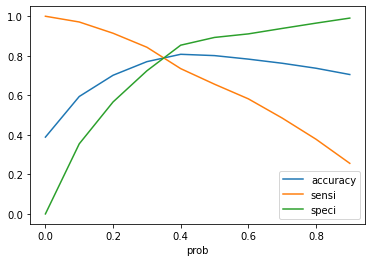

In [107]:
#Plotting cutoffs_df
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The Accuracy, Sensitivity and specificity intersect at 0.39. Hence, at around 0.39,optimal values of the three metrics can be obtained. 

Using 0.39 as the cutoff.

In [108]:
y_train_prediction_final['predicted_final'] = y_train_prediction_final.Conversion_Probab.map(lambda x: 1 if x > 0.39 else 0)
y_train_prediction_final.head()

,Converted,Conversion_Probab,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_final
0,0,0.303704,8922,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.664282,122,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.349139,5028,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.300697,6262,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.093364,8762,0,1,0,0,0,0,0,0,0,0,0,0


In [109]:
# Checking the overall accuracy
accuracy=metrics.accuracy_score(y_train_prediction_final.Converted, y_train_prediction_final.predicted_final)
accuracy

0.8056586270871985

The accuracy value is 0.81 which is a pretty good value

In [110]:
#Creating the confusion matrix again
confusion_2 = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final.predicted_final)
confusion_2

array([[3354,  601],
       [ 656, 1857]], dtype=int64)

In [111]:
#Looking into other metrics

#True Positive (TP)
TP=confusion_2[1,1] 
#True Negatives (TN)
TN=confusion_2[0,0] 
#False Positives (FP)
FP=confusion_2[0,1] 
#False Negatives (FN)
FN=confusion_2[1,0]

In [112]:
#Calculating sensitivity
sensitivity_2=TP/float(TP+FN)
print(sensitivity_2)

0.7389574214086749


The sensitivity value is 0.74

In [113]:
#Calculating specificity
specificity_2=TN/float(TN+FP)
print(specificity_2)

0.8480404551201012


The specificity value is 0.85

In [114]:
y_train_prediction_final['lead_score'] = y_train_prediction_final.Conversion_Probab.map(lambda x: round(x*100))
y_train_prediction_final.head(15)

,Converted,Conversion_Probab,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_final,lead_score
0,0,0.303704,8922,0,1,1,1,1,0,0,0,0,0,0,0,30
1,1,0.664282,122,1,1,1,1,1,1,1,1,0,0,0,1,66
2,0,0.349139,5028,0,1,1,1,1,0,0,0,0,0,0,0,35
3,0,0.300697,6262,0,1,1,1,1,0,0,0,0,0,0,0,30
4,0,0.093364,8762,0,1,0,0,0,0,0,0,0,0,0,0,9
5,1,0.962062,9219,1,1,1,1,1,1,1,1,1,1,1,1,96
6,1,0.674875,2760,1,1,1,1,1,1,1,1,0,0,0,1,67
7,1,0.717272,3903,1,1,1,1,1,1,1,1,1,0,0,1,72
8,0,0.045579,5530,0,1,0,0,0,0,0,0,0,0,0,0,5
9,0,0.108242,4689,0,1,1,0,0,0,0,0,0,0,0,0,11


In [115]:
#Checking conversion rate
check_train = y_train_prediction_final.loc[y_train_prediction_final['Converted']==1,['Converted','predicted_final']]
check_train['predicted_final'].value_counts()

1    1857
0     656
Name: predicted_final, dtype: int64

In [116]:
#Checking the precentage of conversion
1857/float(1857+656)

0.7389574214086749

The conversion rate is 74% which is a significant increase in the conversion rate when compared to the conversion rate of 39% 

# Looking at Precision and Recall

In [117]:
#Getting the precision score
precision=precision_score(y_train_prediction_final.Converted, y_train_prediction_final.Predicted)
print(precision)

0.7954655089242644


The precision score is 0.79

In [118]:
#Getting the recall score
recall=recall_score(y_train_prediction_final.Converted, y_train_prediction_final.Predicted)
print(recall)

0.6561878233187426


The recall score is 0.65

# Precision - Recall Tradeoff

In [119]:
y_train_prediction_final.Converted, y_train_prediction_final.Predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    0
 6465    0
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

In [120]:
p,r,thresholds=precision_recall_curve(y_train_prediction_final.Converted,y_train_prediction_final.Conversion_Probab)

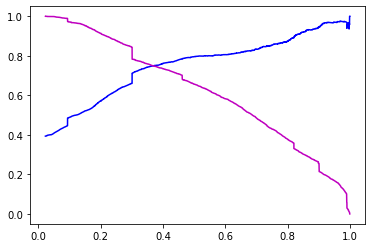

In [121]:
#Plotting the precision and recall trade off
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "m-")
plt.show()

The precision and recall intersects at 0.40.

In [122]:
#Using 0.40
y_train_prediction_final['predicted_final'] = y_train_prediction_final.Conversion_Probab.map(lambda x: 1 if x > 0.40 else 0)
y_train_prediction_final.head()

,Converted,Conversion_Probab,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_final,lead_score
0,0,0.303704,8922,0,1,1,1,1,0,0,0,0,0,0,0,30
1,1,0.664282,122,1,1,1,1,1,1,1,1,0,0,0,1,66
2,0,0.349139,5028,0,1,1,1,1,0,0,0,0,0,0,0,35
3,0,0.300697,6262,0,1,1,1,1,0,0,0,0,0,0,0,30
4,0,0.093364,8762,0,1,0,0,0,0,0,0,0,0,0,0,9


In [123]:
#Checking accuracy
print(metrics.accuracy_score(y_train_prediction_final.Converted, y_train_prediction_final.predicted_final))

0.8075139146567718


The accuracy value is 81% which is a pretty good value

In [124]:
#Confusion Matrix
confusion_3= metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final.predicted_final)
confusion_3

array([[3376,  579],
       [ 666, 1847]], dtype=int64)

In [125]:
#Looking into other metrics

#True Positive (TP)
TP=confusion_3[1,1] 
#True Negatives (TN)
TN=confusion_3[0,0] 
#False Positives (FP)
FP=confusion_3[0,1] 
#False Negatives (FN)
FN=confusion_3[1,0]

In [126]:
#Calculating sensitivity
sensitivity_3=TP/float(TP+FN)
print(sensitivity_3)

0.7349781138081973


The sensitivity value is 0.734

In [127]:
#Calculating specificity
specificity_3=TN/float(TN+FP)
print(specificity_3)

0.8536030341340076


The specificity value is 0.85

# 9. PREDICTION ON THE TEST SET

In [128]:
#Scaling the variables in the test set
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [129]:
#Keeping just the variables in the final model
X_test = X_test[final_vars]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Specialization_Select,Specialization_not provided,What is your current occupation_Working Professional,What is your current occupation_not provided,TotalVisits
5781,0.037438,0,0,0,0,0,0,0,0,0,0,0,0.023904
7067,0.085701,1,0,1,0,0,0,1,0,0,0,0,0.003984
1746,0.000000,0,1,0,0,0,0,0,1,0,0,0,0.000000
4156,0.023004,0,0,0,0,0,0,0,1,0,0,0,0.011952
4622,0.233649,0,0,0,0,0,0,0,0,0,0,0,0.011952


In [130]:
#Adding constant variable
y_test_prediction= result.predict(sm.add_constant(X_test))

In [131]:
y_prediction_1 = pd.DataFrame(y_test_prediction)
y_test_df = pd.DataFrame(y_test)
y_prediction_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_prediction_final = pd.concat([y_test_df, y_prediction_1],axis=1)
y_prediction_final.head()

,Converted,0
0,0,0.311784
1,0,0.053689
2,1,0.820234
3,0,0.167681
4,0,0.502491


In [132]:
y_prediction_final= y_prediction_final.rename(columns = {0 : 'Conversion_Probab'})
y_prediction_final.head()

,Converted,Conversion_Probab
0,0,0.311784
1,0,0.053689
2,1,0.820234
3,0,0.167681
4,0,0.502491


In [133]:
#Make predictions on the test set using 0.4 as the cutoff
y_prediction_final['predicted_final'] = y_prediction_final.Conversion_Probab.map(lambda x: 1 if x > 0.4 else 0)

In [134]:
#Calculating the lead score
y_prediction_final['lead_score'] = y_prediction_final.Conversion_Probab.map(lambda x: round(x*100))
y_prediction_final.head(15)

,Converted,Conversion_Probab,predicted_final,lead_score
0,0,0.311784,0,31
1,0,0.053689,0,5
2,1,0.820234,1,82
3,0,0.167681,0,17
4,0,0.502491,1,50
5,0,0.146519,0,15
6,1,0.563052,1,56
7,0,0.013850,0,1
8,0,0.075490,0,8
9,0,0.063951,0,6


In [135]:
check_test = y_prediction_final.loc[y_prediction_final['Converted']==1,['Converted','predicted_final']]
check_test['predicted_final'].value_counts()

1    753
0    295
Name: predicted_final, dtype: int64

In [136]:
753/float(753+295)

0.7185114503816794

Conversion rate on test set is 72%.

In [137]:
#Accuracy
print(metrics.accuracy_score(y_prediction_final['Converted'], y_prediction_final.predicted_final))

0.8055555555555556


The accuracy value on the test set is 81% which is a good value.

In [138]:
#Confusion Matrix
confusion_4 = metrics.confusion_matrix(y_prediction_final['Converted'], y_prediction_final.predicted_final)
confusion_4

array([[1480,  244],
       [ 295,  753]], dtype=int64)

In [139]:
#Looking into other metrics

#True Positive (TP)
TP=confusion_4[1,1] 
#True Negatives (TN)
TN=confusion_4[0,0] 
#False Positives (FP)
FP=confusion_4[0,1] 
#False Negatives (FN)
FN=confusion_4[1,0]

In [140]:
#Calculating sensitivity
sensitivity_4=TP/float(TP+FN)
print(sensitivity_4)

0.7185114503816794


The sensitivity value is 0.72

In [141]:
#Calculating specificity
specificity_4=TN/float(TN+FP)
print(specificity_4)

0.8584686774941995


The specificity value is 0.86

The choice of cut-off has worked out well as the sensitivity and specificty has worked out well on the test set.

**Precision and Recall on the test data**

In [142]:
precision_test=precision_score(y_prediction_final.Converted, y_prediction_final.predicted_final)
precision_test

0.7552657973921765

The precision score is 0.76

In [143]:
recall_test=recall_score(y_prediction_final.Converted, y_prediction_final.predicted_final)
recall_test

0.7185114503816794

The recall score is 0.72

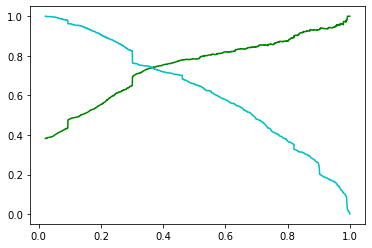

In [144]:
p,r,thresholds=precision_recall_curve(y_prediction_final.Converted, y_prediction_final.Conversion_Probab)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "c-")
plt.show()

The precision and recall intersects at 0.39

**CONCLUSION**

The Accuracy, Sensitivity and Specificity values of the test set are around 81%, 72% and 86% which are approximately close to the values obtained from the train set implying that the model is good. The variable TotalVisits has the highest coefficient value implying that this variable has the highest significant positive influence on whether the lead will be converted or not. The variable total time spent on the website has a high coefficient value implying that it has the highest positive influence on whether the lead will be converted or not. Leads originating from add form also has a high positive impact on whether the lead will be converted or not. The lead source being Welingak Website also has a positive impact on whether a particular lead converts. Working professionals seem to have a high positive impact on whether a particular lead converts. The lead source being Olark Chat also has a positive impact on whether a particular lead converts. Variables that have a negative impact on whether a lead will be converted or not are the leads originating from landing page submission, direct traffic, Specialization being Select, don’t email being yes, Lead Source being Referral Sites, specialisations and occupations that are not provided and the last notable activity that is modified. Since the conversion rate is 74% on the train test and 72% on the test set which is a significant increase in the rate of conversion as compared to the conversion rate of 39%, the company X Education can look into the impact that these variables have on the conversion of leads and work towards improving the conversion rate by focusing on leads with a higher lead score.
